In [2]:
#Importing the dependencies
import os
import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from pylab import rcParams
from pandas import datetime
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')
rcParams['figure.figsize'] = 12, 7
from subprocess import check_output
from pandas.plotting import lag_plot
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
#Import the dataset
df = pd.read_csv('/Users/markjuvert/Desktop/RNN/Limestone_data.csv')
df.head()

,Date,Limestone,Cement,Gold,Interest Rates,Coal,Energy
0,1/2/14,4.70,11.31,18.309999,24.940001,8.40,22.200001
1,1/3/14,4.75,11.26,18.150000,25.100000,8.18,22.680000
2,1/6/14,4.85,11.31,18.350000,25.139999,8.23,23.330000
3,1/7/14,5.10,11.45,18.270000,25.129999,8.27,23.889999
4,1/8/14,5.05,11.46,17.959999,25.070000,8.08,23.770000


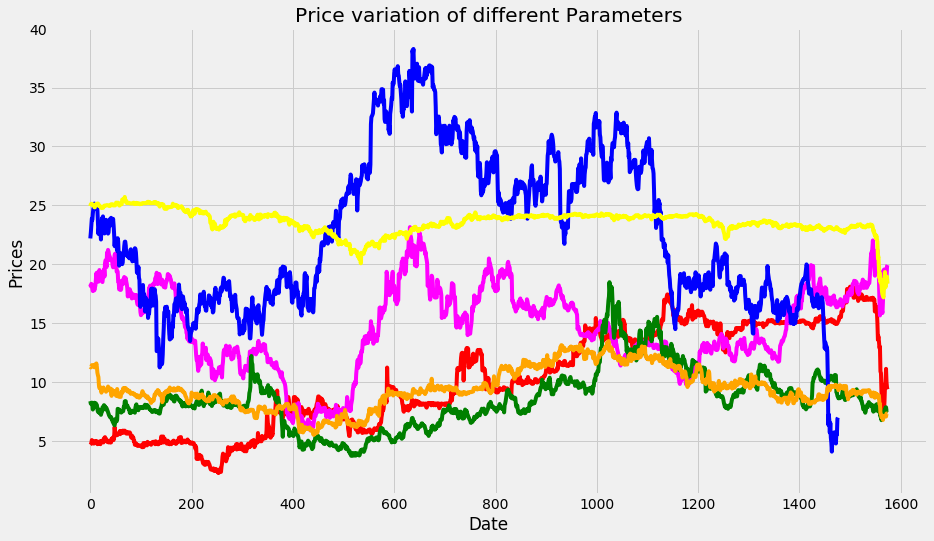

In [4]:
#Visualize the data
plt.figure(figsize=(14,8))
plt.plot(df['Limestone'], color= 'red', label='Limestone Price history')
plt.plot(df['Gold'], color= 'green', label='Gold Price history')
plt.plot(df['Coal'], color= 'magenta', label='Coal Price history')
plt.plot(df['Energy'], color= 'blue', label='Energy Price history')
plt.plot(df['Cement'], color= 'orange', label='Cement Price history')
plt.plot(df['Interest Rates'], color= 'yellow', label='Interest Rates Price history')
plt.title('Price variation of different Parameters')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.show()

In [5]:
#Preprocessing our data
df = df['Limestone'].values
df = df.reshape(-1,1)
print(df.shape)
df[:7]

(1575, 1)


array([[4.7 ],
       [4.75],
       [4.85],
       [5.1 ],
       [5.05],
       [4.95],
       [5.  ]])

In [6]:
#Splitting the dataset into training set and test set
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])
print(dataset_train.shape)
print(dataset_test.shape)

(1260, 1)
(365, 1)


In [7]:
#Normalizing the data
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:7]

dataset_test = scaler.transform(dataset_test)
dataset_test[:7]

def create_my_dataset(df):
    x = []
    y = []
    for i in range(50,df.shape[0]):
        x.append(df[i-50:i,0])
        y.append(df[i,0])
    x = np.array(x)
    y = np.array(y)
    return x,y

x_train, y_train = create_my_dataset(dataset_train)
x_train[:1]

y_train[:1]

x_test, y_test = create_my_dataset(dataset_test)
x_test[:1]


array([[0.88448839, 0.88382832, 0.87788773, 0.86468641, 0.8415841 ,
        0.83828377, 0.82244219, 0.85478542, 0.85478542, 0.83828377,
        0.82178212, 0.8396039 , 0.83828377, 0.83828377, 0.84818476,
        0.84686463, 0.8396039 , 0.8396039 , 0.8396039 , 0.8396039 ,
        0.84818476, 0.81518146, 0.80528047, 0.82772272, 0.8165016 ,
        0.81584153, 0.83828377, 0.83828377, 0.7775577 , 0.78283823,
        0.78283823, 0.77227718, 0.79207916, 0.79999995, 0.83828377,
        0.79537949, 0.77227718, 0.77227718, 0.74719467, 0.690429  ,
        0.70627058, 0.71287124, 0.71287124, 0.70627058, 0.67524748,
        0.72739269, 0.73465342, 0.75643559, 0.79009896, 0.75577553]])

In [8]:
#Reshaping for LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
print(x_train.shape)
print(x_test.shape)

(1210, 50, 1)
(315, 50, 1)


In [9]:
#visualizing the accuracy and loss of the model

def visualize_results(results):
        history = results.history
        plt.figure(figsize=(14,8))
        plt.plot(history['val_loss'])
        plt.plot(history['loss'])
        plt.legend(['val_loss','loss'])
        plt.title('loss')
        plt.xlabel('epochs')
        plt.ylabel('loss')
        plt.show

        plt.figure(figsize=(14,8))
        plt.plot(history['val_accuracy'])
        plt.plot(history['accuracy'])
        plt.legend(['val_accuracy','accuracy'])
        plt.title('accuracy')
        plt.xlabel('epochs')
        plt.ylabel('accuracy')
        plt.show

In [10]:
#Defining LSTM layers
model = Sequential()
model.add(LSTM(units=40, activation = 'relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=10, activation = 'relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=10, activation = 'relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=10, activation = 'relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=10, activation = 'relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(10, activation='relu'))
model.add(Dense(units=1))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 40)            6720      
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 10)            2040      
_________________________________________________________________
lstm_3 (LSTM)                (None, 50, 10)            840       
_________________________________________________________________
lstm_4 (LSTM)                (None, 50, 10)            840       
_________________________________________________________________
lstm_5 (LSTM)                (None, 50, 10)            840       
_________________________________________________________________
lstm_6 (LSTM)                (None, 10)                840       
________________________________________________

In [11]:
#Training the model
model.compile(loss='mean_squared_error', optimizer ='adam', metrics=['accuracy'])
res = model.fit(x_train, y_train, epochs=15, batch_size=32, validation_split=0.1, shuffle=True, verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 1089 samples, validate on 121 samples
Epoch 1/15
1089/1089 [==============================] - 6s 6ms/step - loss: 0.1163 - accuracy: 9.1827e-04 - val_loss: 0.1981 - val_accuracy: 0.0000e+00
Epoch 2/15
1089/1089 [==============================] - 4s 4ms/step - loss: 0.0507 - accuracy: 9.1827e-04 - val_loss: 0.2140 - val_accuracy: 0.0000e+00
Epoch 3/15
1089/1089 [==============================] - 4s 4ms/step - loss: 0.0265 - accuracy: 9.1827e-04 - val_loss: 0.0504 - val_accuracy: 0.0165
Epoch 4/15
1089/1089 [==============================] - 4s 4ms/step - loss: 0.0063 - accuracy: 9.1827e-04 - val_loss: 0.0100 - val_accuracy: 0.0165
Epoch 5/15
1089/1089 [==============================] - 4s 4ms/step - loss: 0.0045 - accuracy: 9.1827e-04 - val_loss: 0.0082 - val_accuracy: 0.0165
Epoch 6/15
1089/1089 [==============================] - 4s 4ms/step - loss: 0.0043 - accuracy: 9.1827e-04 - val_loss: 0.0065 - val_accuracy: 0.0165
Epoch 7/1

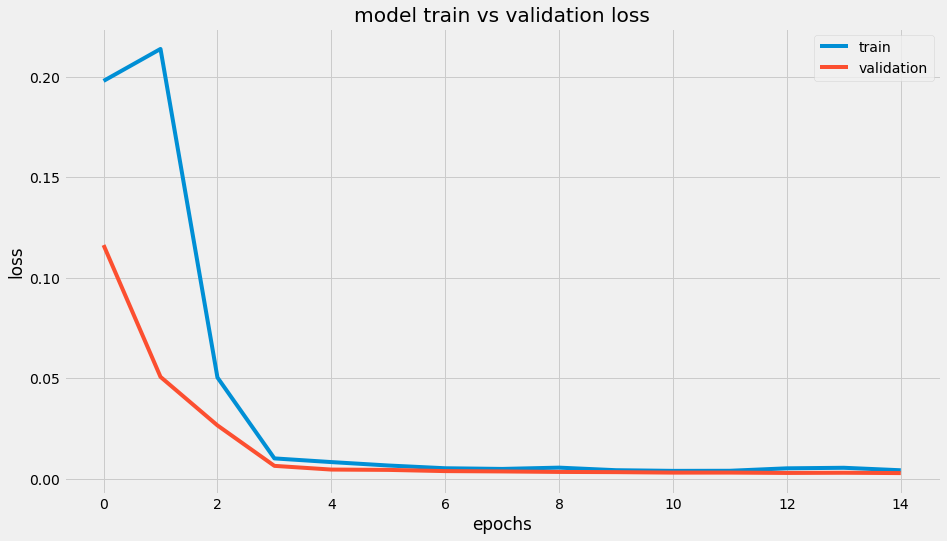

In [12]:
#visualizing the accuracy and loss of the model

def visualize_results(results):
        history = results.history
        plt.figure(figsize=(14,8))
        plt.plot(history['val_loss'])
        plt.plot(history['loss'])
        plt.legend(['train', 'validation'], loc='upper right') 
        plt.title('model train vs validation loss') 
        plt.xlabel('epochs')
        plt.ylabel('loss')
        plt.show

        plt.figure(figsize=(14,8))
        plt.plot(history['val_accuracy'])
        plt.plot(history['accuracy'])
        plt.legend(['val_accuracy','accuracy'])
        plt.title('accuracy')
        plt.xlabel('epochs')
        plt.ylabel('accuracy')
        plt.show
visualize_results(res)

range(1260, 1575)


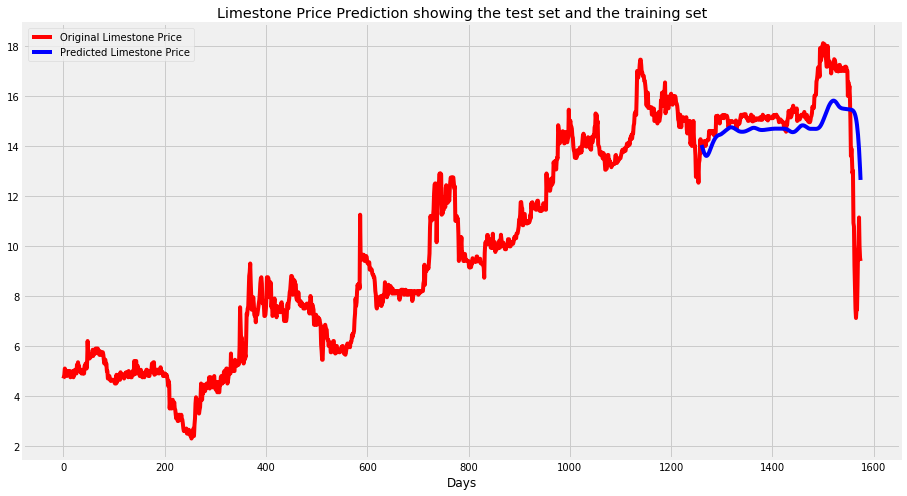

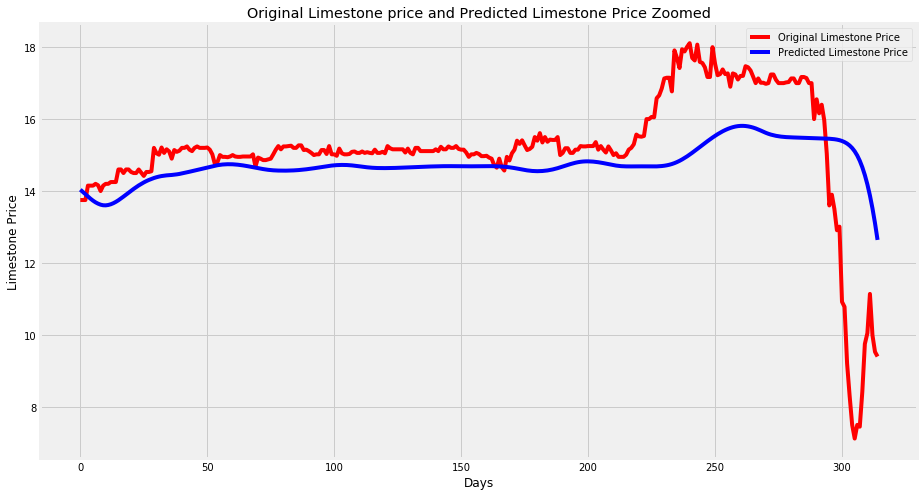

In [13]:
#visualizing our predictions
%matplotlib inline
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

fig, ax = plt.subplots(figsize=(14,8))
plt.plot(df, color='red', label='Original Limestone Price')
ax.plot(range(len(y_train)+50, len(y_train)+50+len(predictions)),predictions,color='blue', label='Predicted Limestone Price')
plt.title('Limestone Price Prediction showing the test set and the training set')
plt.xlabel('Days')
plt.legend()
print(range(len(y_train)+50, len(y_train)+50+len(predictions)))

y_test_scaled = scaler.inverse_transform(y_test.reshape(-2,1))

fig, ax = plt.subplots(figsize=(14,8))
ax.plot(y_test_scaled, color='red', label = 'Original Limestone Price')
plt.plot(predictions, color = 'blue', label='Predicted Limestone Price')
plt.title('Original Limestone price and Predicted Limestone Price Zoomed')
plt.xlabel('Days')
plt.ylabel('Limestone Price')
plt.legend()
plt.show()

range(1360, 1575)


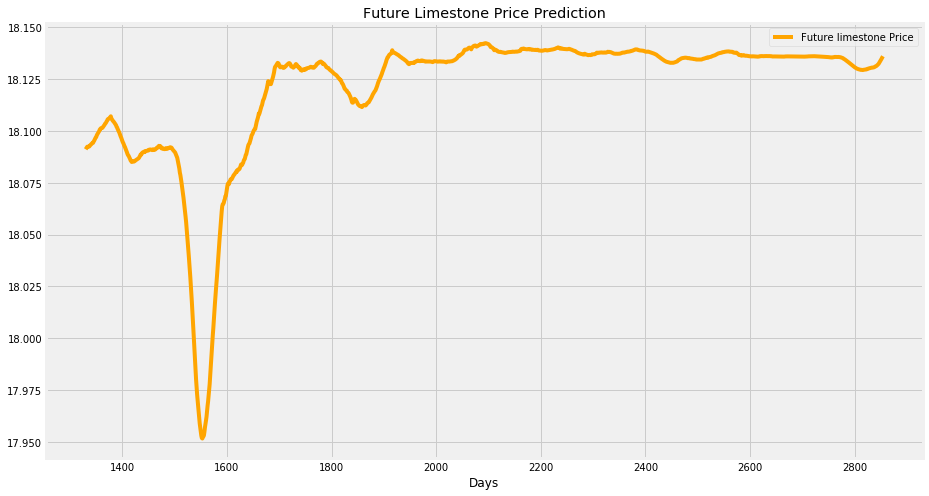

In [14]:
#Predicting Future Limestone Price

#Make reference to the dataset
dataset_ref = np.array(df[:int(df.shape[0])])

#Create a reference dataset
x_ref, y_ref = create_my_dataset(dataset_ref)

# to show the 1st entry
x_ref[:0]   

# to show the 1st entry of future predictions
y_ref[:0]   

# reshaping for LSTM

x_ref = np.reshape(x_ref, (x_ref.shape[0], x_train.shape[1],1))

preds = model.predict(x_ref)

#inverse transform 0 to 1 data to true value

preds = scaler.inverse_transform(preds)

#visualizing our predictions
%matplotlib inline
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(range(len(y_train)+120,len(y_train)+120+len(preds)),preds,color='orange',label='Future limestone Price')
plt.title('Future Limestone Price Prediction')
plt.xlabel('Days')
plt.legend()
print(range(len(y_train)+150, len(y_train)+50+len(predictions)))

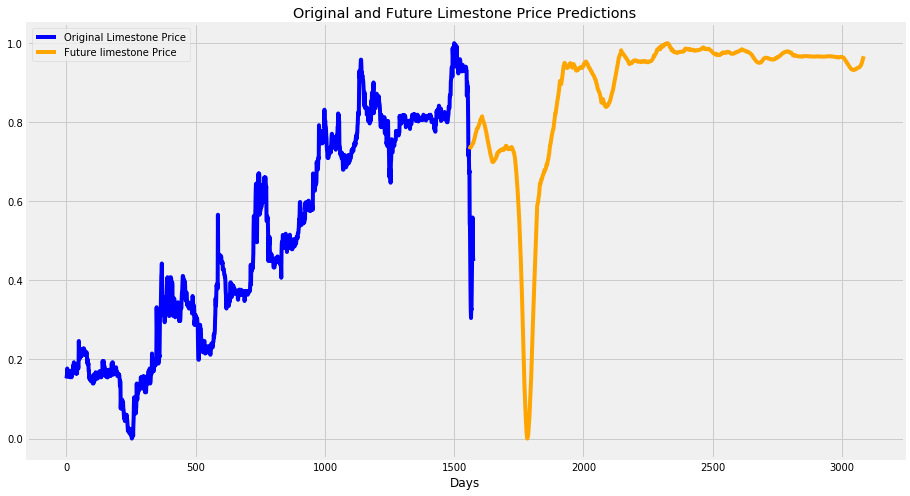

In [15]:
#Visualizing the original data and the predicted data
preds = scaler.fit_transform(preds)
df = scaler.fit_transform(df)
fig, ax = plt.subplots(figsize=(14,8))
plt.plot(df, color='blue', label='Original Limestone Price') 
plt.plot(range(len(y_train)+350,len(y_train)+350+len(preds)),preds,color='orange',label='Future limestone Price')
plt.title('Original and Future Limestone Price Predictions')
plt.xlabel('Days')
plt.legend()